In [42]:
import matplotlib.pyplot as plt
import json
from pathlib import Path
import pandas as pd
import numpy as np
import re
import pickle
from collections import namedtuple

%matplotlib inline

In [43]:
model = namedtuple('model', ['shape', 'activation', 'features', 'learning_rate'])

In [44]:
with open('./data/tests.pkl', 'rb') as f:
    data = pickle.load(f)
data.keys(), data['files'][100]

(dict_keys(['files', 'testing', 'training']),
 model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.2_0.01'))

In [45]:
shapes = sorted({i.shape for i in data['files']})
print(shapes)

activations = sorted({i.activation for i in data['files']})
print(activations)

features = sorted({i.features for i in data['files']})
print(features)

learning_rates = sorted({i.learning_rate for i in data['files']})
print(learning_rates)

training_keys = sorted(data['training'][data['files'][0]].columns)
print(training_keys)

testing_keys = sorted(data['testing'][data['files'][0]].columns)
print(testing_keys)

['16_12_8', '16_8', '24_16_12_8', '8']
['sigmoid', 'tanh']
['10', '20', '30']
['0.1_0.01', '0.1_0.1', '0.2_0.001', '0.2_0.01', '0.2_0.2']
['accuracy', 'epoch', 'iteration', 'len', 'lr', 'time', 'total_loss']
['test_accuracy', 'test_loss']


In [95]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['16_8']
        or k.activation not in ['sigmoid']
        or k.features not in ['10', '20', '30']
        or k.learning_rate not in ['0.2_0.001']
       ):
        continue
#     v['test_accuracy'].iloc[::4].plot(label=k)
    print(k)
    l.append(k)
# plt.legend()

model(shape='16_8', activation='sigmoid', features='30', learning_rate='0.2_0.001')
model(shape='16_8', activation='sigmoid', features='10', learning_rate='0.2_0.001')
model(shape='16_8', activation='sigmoid', features='20', learning_rate='0.2_0.001')


Text(0,0.5,'błąd średniokwadratowy')

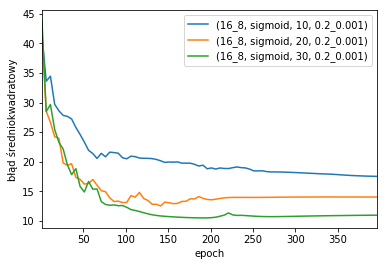

In [96]:
n = 5
data['testing'][l[1]]['test_loss'].iloc[::n].plot(label=l[1])
data['testing'][l[2]]['test_loss'].iloc[::n].plot(label=l[2])
data['testing'][l[0]]['test_loss'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('błąd średniokwadratowy')

Text(0,0.5,'dokładność [%]')

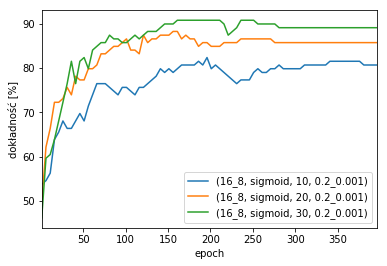

In [97]:
(100 * data['testing'][l[1]])['test_accuracy'].iloc[::n].plot(label=l[1])
(100 * data['testing'][l[2]])['test_accuracy'].iloc[::n].plot(label=l[2])
(100 * data['testing'][l[0]])['test_accuracy'].iloc[::n].plot(label=l[0])
plt.legend()
plt.ylabel('dokładność [%]')

In [98]:
df0 = data['testing'][l[0]]
df1 = data['testing'][l[1]]
df2 = data['testing'][l[2]]
print(df1.columns)
df = pd.concat([df1, df2, df0], axis=1)
for i, j in df.iterrows():
    if i != 1 and i % 10:
        continue
    print(r'{} & {} \\ \hline'.format(i, ' & '.join([f'{i:.3f}' for i in j])))

Index(['test_accuracy', 'test_loss'], dtype='object')
1 & 0.538 & 41.299 & 0.496 & 41.714 & 0.462 & 43.907 \\ \hline
10 & 0.571 & 34.109 & 0.613 & 26.876 & 0.613 & 28.462 \\ \hline
20 & 0.647 & 29.445 & 0.714 & 24.232 & 0.655 & 23.769 \\ \hline
30 & 0.664 & 27.188 & 0.723 & 20.451 & 0.765 & 20.308 \\ \hline
40 & 0.672 & 26.045 & 0.782 & 17.584 & 0.765 & 18.426 \\ \hline
50 & 0.681 & 23.634 & 0.782 & 16.687 & 0.824 & 15.077 \\ \hline
60 & 0.739 & 21.233 & 0.790 & 16.759 & 0.849 & 14.902 \\ \hline
70 & 0.773 & 20.575 & 0.832 & 15.302 & 0.849 & 13.756 \\ \hline
80 & 0.765 & 22.901 & 0.849 & 14.367 & 0.874 & 12.665 \\ \hline
90 & 0.739 & 21.739 & 0.849 & 13.351 & 0.866 & 12.680 \\ \hline
100 & 0.765 & 21.240 & 0.857 & 13.708 & 0.857 & 12.414 \\ \hline
110 & 0.739 & 20.959 & 0.832 & 14.686 & 0.874 & 11.797 \\ \hline
120 & 0.756 & 20.595 & 0.866 & 13.803 & 0.874 & 11.426 \\ \hline
130 & 0.773 & 20.562 & 0.874 & 12.516 & 0.882 & 11.068 \\ \hline
140 & 0.798 & 20.210 & 0.874 & 12.519 & 0.891 &